In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

El set de datos tiene la siguiente informacion.

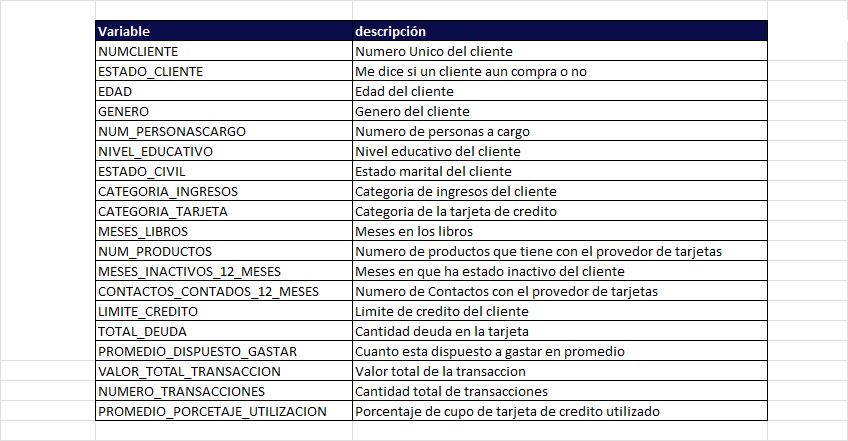

In [66]:
data = pd.read_csv("/content/drive/MyDrive/Proyecto/Datos_cliente.csv")
data.head(5)

,NUMCLIENTE,ESTADO_CLIENTE,EDAD,GENERO,NUM_PERSONASCARGO,NIVEL_EDUCATIVO,ESTADO_CIVIL,CATEGORIA_INGRESOS,CATEGORIA_TARJETA,MESES_LIBROS,NUM_PRODUCTOS,MESES_INACTIVOS_12_MESES,CONTACTOS_CONTADOS_12_MESES,LIMITE_CREDITO,TOTAL_DEUDA,PROMEDIO_DISPUESTO_GASTAR,VALOR_TOTAL_TRANSACCION,NUMERO_TRANSACCIONES,PROMEDIO_PORCETAJE_UTILIZACION
0,768805383,Cliente_activo,45,M,3,Colegio,Casado,$60K - $80K,Azul,39,5,1,3,12691.0,777,11914.0,1144,42,61.00
1,818770008,Cliente_activo,49,F,5,Graduado,Soltero,Menos de $40K,Azul,44,6,1,2,8256.0,864,7392.0,1291,33,105.00
2,713982108,Cliente_activo,51,M,3,Graduado,Casado,$80K - $120K,Azul,36,4,1,0,3418.0,0,3418.0,1887,20,0.00
3,769911858,Cliente_activo,40,F,4,Colegio,Desconocido,Menos de $40K,Azul,34,3,4,1,3313.0,2517,796.0,1171,20,0.76
4,709106358,Cliente_activo,40,M,3,Sin Educacion,Casado,$60K - $80K,Azul,21,5,1,0,4716.0,0,4716.0,816,28,0.00


# Preparacion de datos

1. Integración de los datos
2. Eliminar variables irrelevantes y redundantes
3. Arreglar errores tipograficos en variables categoricas
4. Descripción estadística de los datos
5. Limpieza de datos atípicos
6. Limpieza de nulos
7. Representacion de varibles categoricas como numericas
8. Division de datos



# 1. Integracion de datos

Todos nuestros datos vienen de una sola base de datos, en este paso solo vamos a eliminar los datos duplicados


In [67]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (10127, 19)
Tamaño del set después de eliminar las filas repetidas: (10127, 19)


# 2. Columnas Irrelevantes y redundantes
Una columna irrelevante puede ser:

1. Una columna que no contiene información relevante para el problema que queremos resolver. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
2. Una columna categórica pero con una sóla categoria. Por ejemplo si en la columna "marital_status" solo tuviésemos el nivel "unknown".
Una columna numérica pero con un sólo valor. Por ejemplo si en la columna "edad" todos los vlaores fuesen iguales a 50.
3. Columnas con información redundante. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.
Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso la columna "Months_on_book" se considera no relevante para el estudio y debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

In [68]:
data.drop(["NUMCLIENTE","MESES_LIBROS"],axis=1,inplace=True)

In [69]:
data.nunique()

ESTADO_CLIENTE                       2
EDAD                                45
GENERO                               2
NUM_PERSONASCARGO                    6
NIVEL_EDUCATIVO                      7
ESTADO_CIVIL                         4
CATEGORIA_INGRESOS                   6
CATEGORIA_TARJETA                    4
NUM_PRODUCTOS                        6
MESES_INACTIVOS_12_MESES             7
CONTACTOS_CONTADOS_12_MESES          7
LIMITE_CREDITO                    6205
TOTAL_DEUDA                       1974
PROMEDIO_DISPUESTO_GASTAR         6813
VALOR_TOTAL_TRANSACCION           5033
NUMERO_TRANSACCIONES               126
PROMEDIO_PORCETAJE_UTILIZACION     964
dtype: int64

Observamos que todas las variables continen mas de un valor por lo que las coservamos todas

# 3. Arreglar errores tipograficos en variables categoricas



In [70]:
categoricas = ["ESTADO_CLIENTE","NIVEL_EDUCATIVO","ESTADO_CIVIL","CATEGORIA_INGRESOS","CATEGORIA_TARJETA"]

In [71]:
for col in categoricas:
  print(f'{col}\n{data[col].value_counts()}\n')

ESTADO_CLIENTE
Cliente_activo      8500
Cliente_inactivo    1627
Name: ESTADO_CLIENTE, dtype: int64

NIVEL_EDUCATIVO
Graduado         3128
Colegio          2013
Desconocido      1519
Sin Educacion    1487
Universidad      1013
Post Graduado     516
Doctorado         451
Name: NIVEL_EDUCATIVO, dtype: int64

ESTADO_CIVIL
Casado         4687
Soltero        3943
Desconocido     749
Divorciado      748
Name: ESTADO_CIVIL, dtype: int64

CATEGORIA_INGRESOS
Menos de $40K    3561
$40K - $60K      1790
$80K - $120K     1535
$60K - $80K      1402
Desconocido      1112
$120K +           727
Name: CATEGORIA_INGRESOS, dtype: int64

CATEGORIA_TARJETA
Azul        9436
Plateada     555
Dorada       116
Platino       20
Name: CATEGORIA_TARJETA, dtype: int64



Encontramos una categoria "Desconocido" en algunas variables categoricas que es un tipo de dato nulo que debemos manejar mas adelante.

# 4. Descripción estadística de los datos

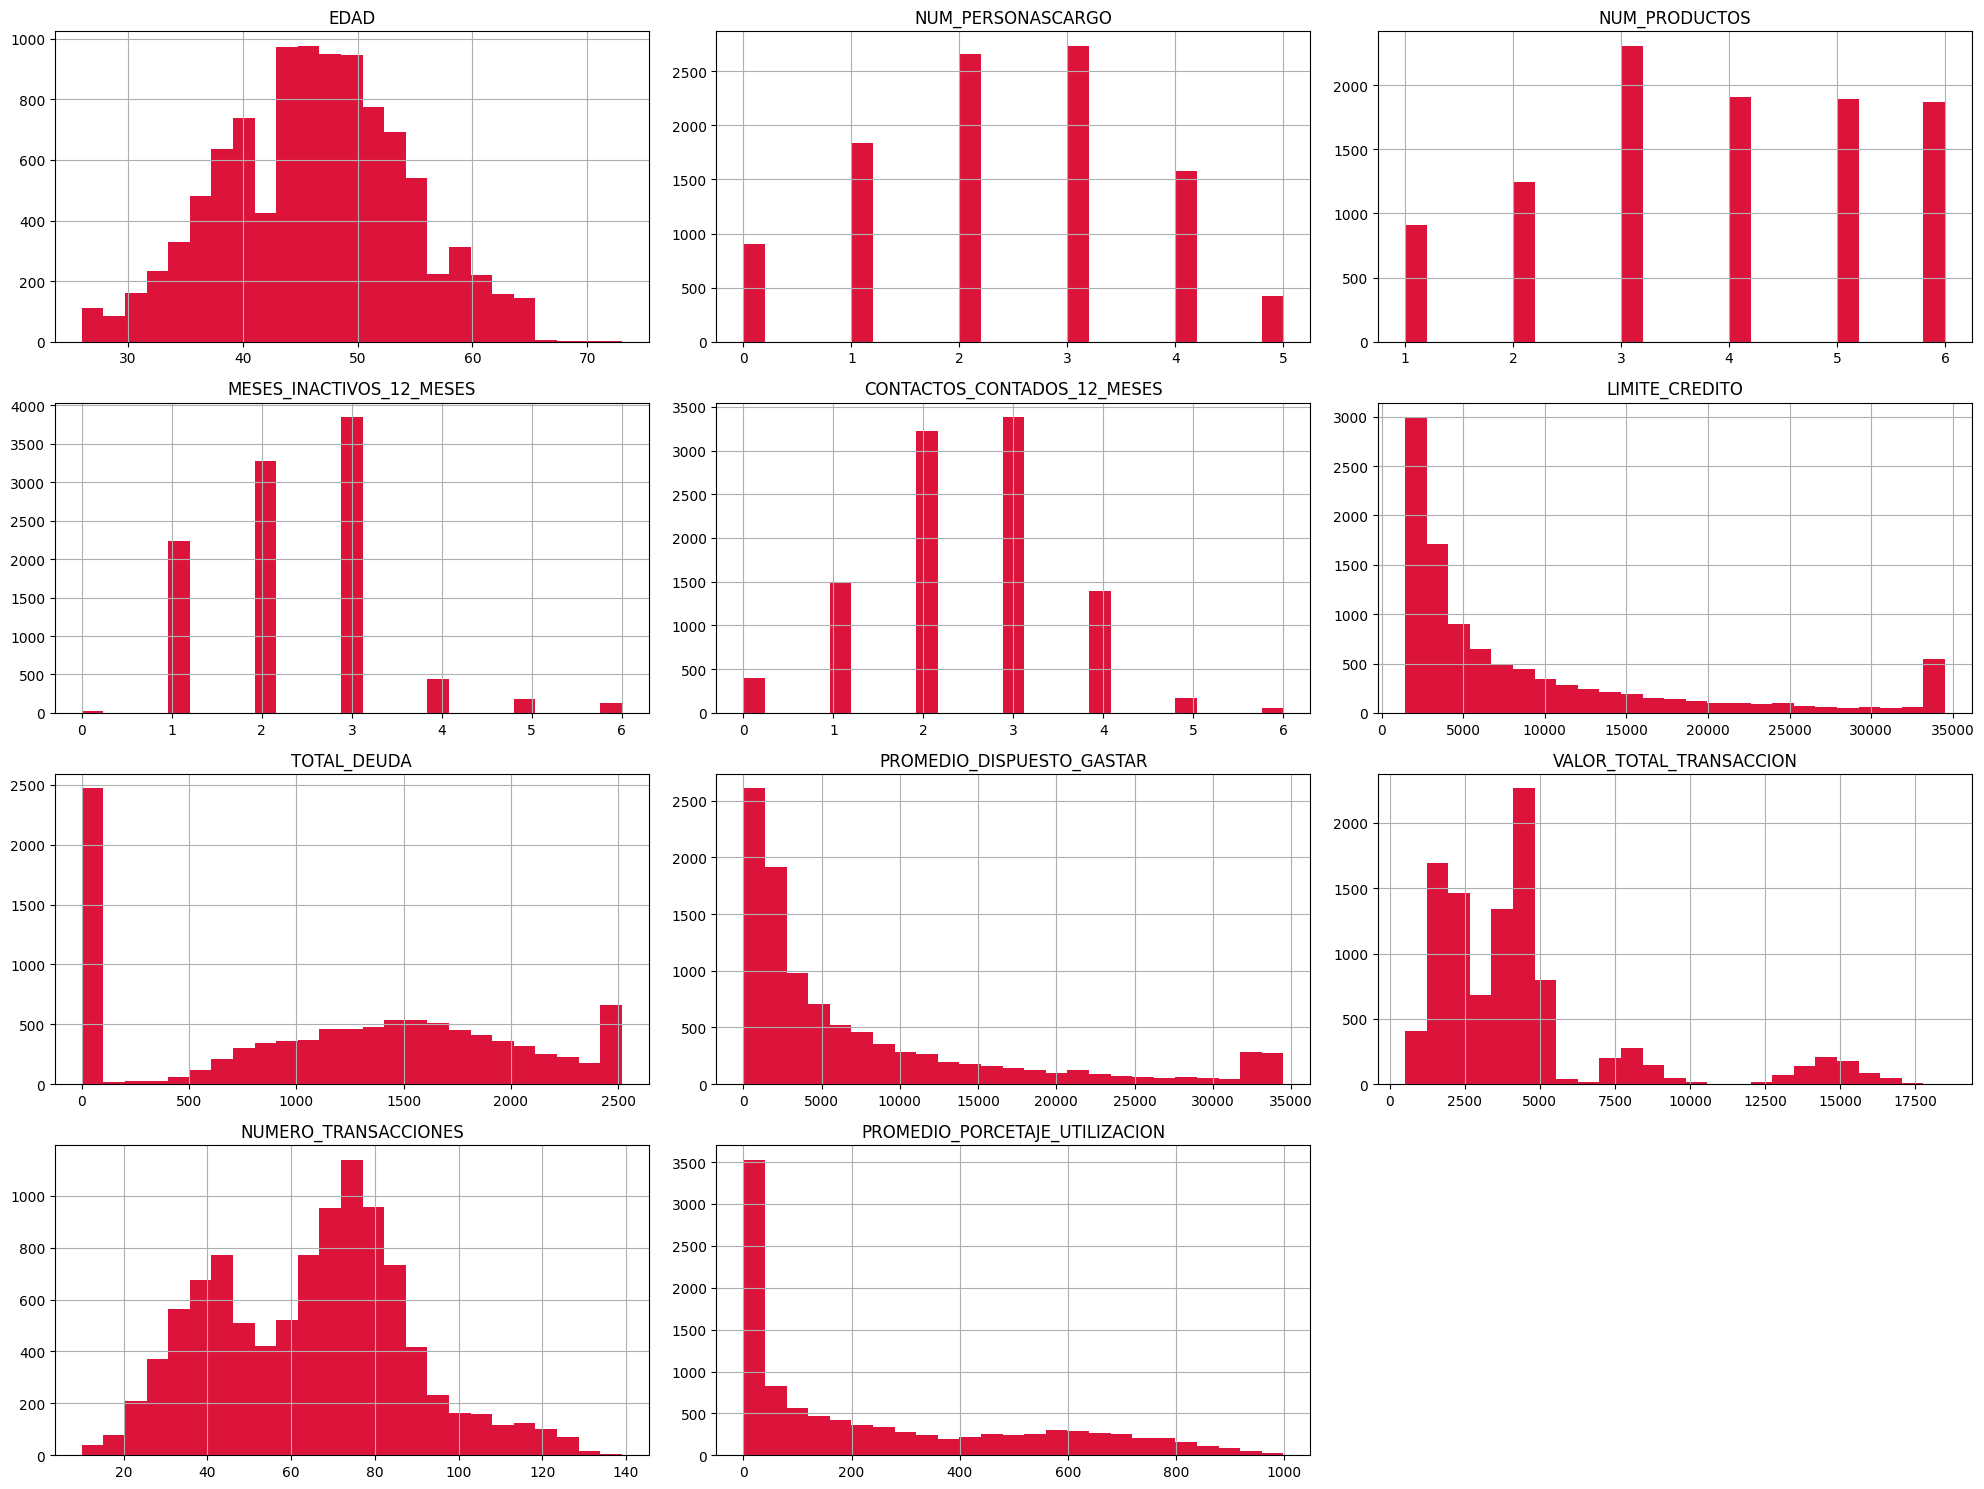

In [72]:
data.hist(bins=25 ,figsize=(20,15), color = 'crimson')

plt.tight_layout()
plt.show()

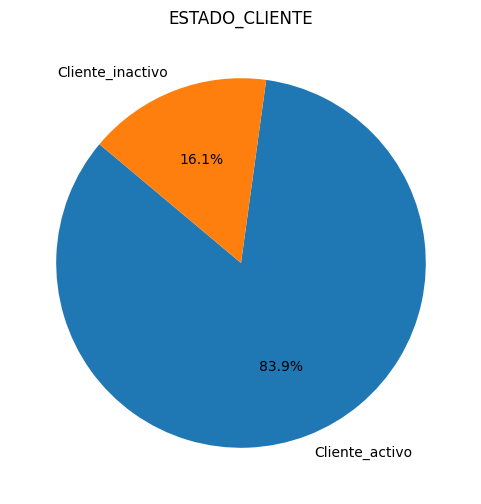

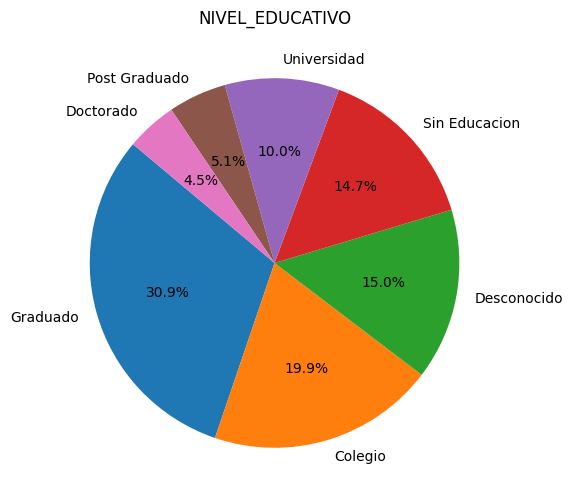

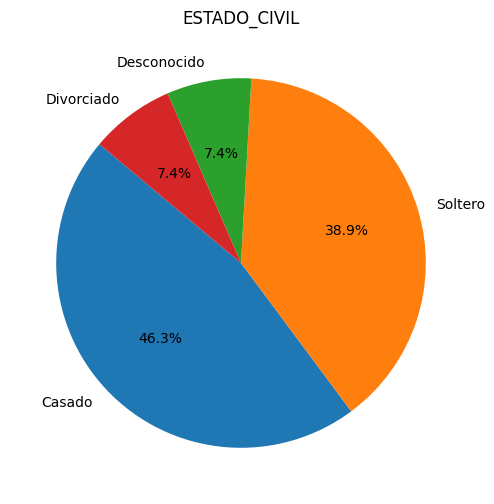

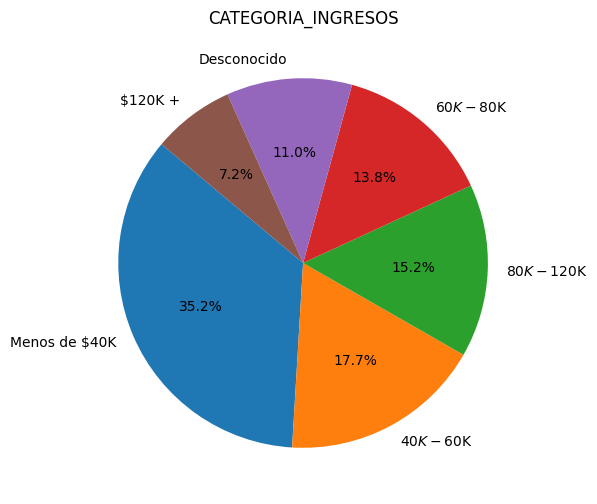

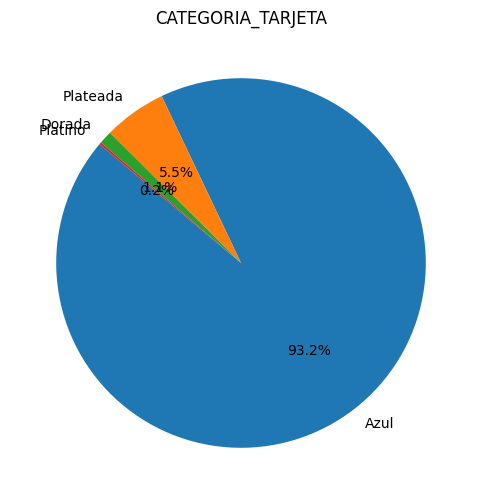

In [73]:
for i, col in enumerate(categoricas):
  plt.figure(figsize=(6, 6))

  plt.pie(data[categoricas[i]].value_counts(), labels=data[categoricas[i]].value_counts().index, autopct='%1.1f%%', startangle=140)
  plt.title(categoricas[i])
  plt.show()


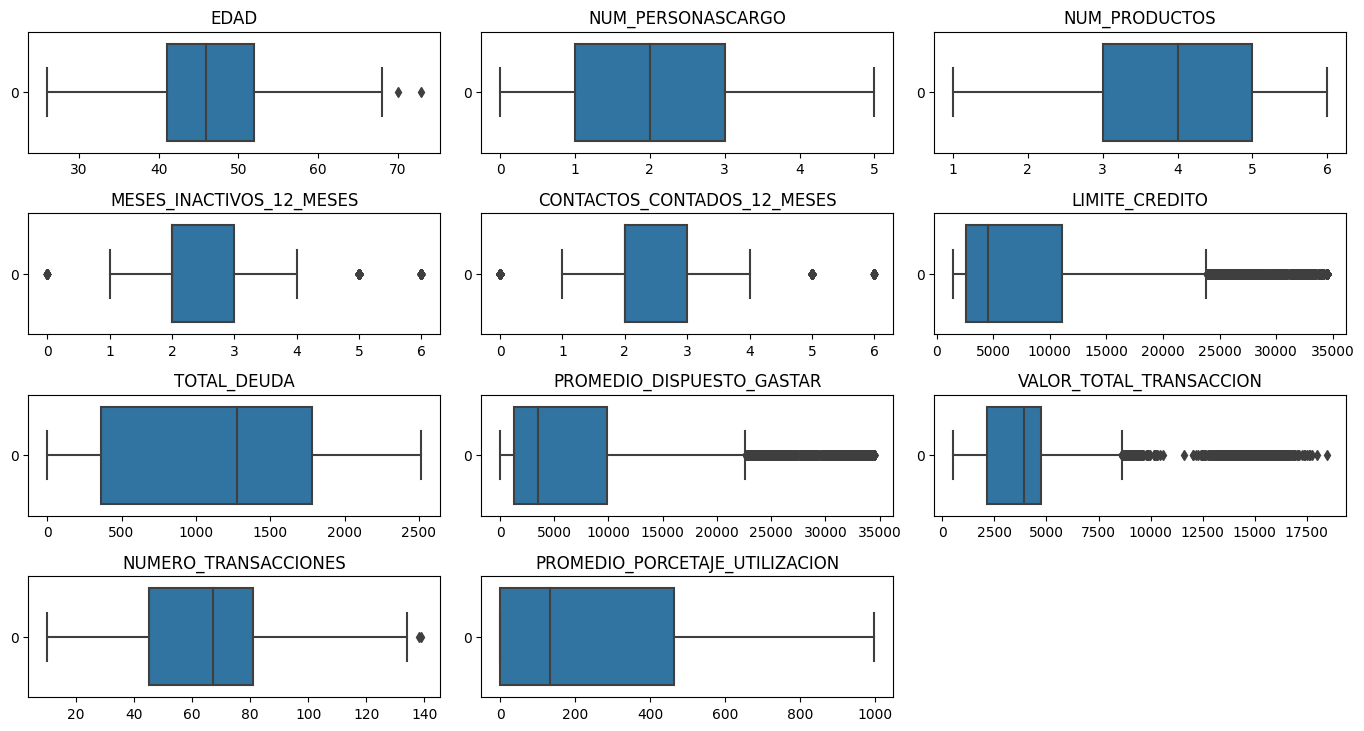

In [74]:
variables_continuas = ["EDAD","NUM_PERSONASCARGO","NUM_PRODUCTOS","MESES_INACTIVOS_12_MESES","CONTACTOS_CONTADOS_12_MESES","LIMITE_CREDITO",
                       "TOTAL_DEUDA","PROMEDIO_DISPUESTO_GASTAR","VALOR_TOTAL_TRANSACCION","NUMERO_TRANSACCIONES","PROMEDIO_PORCETAJE_UTILIZACION"]

plt.figure(1 , figsize = (17 , 11))
n = 0

for i, col in enumerate(variables_continuas):
  n += 1
  plt.subplot( 5, 3 , n)
  #fig= plt.subplots( figsize=(8,1))
  #plt.subplot()
  plt.subplots_adjust(hspace =0.5 , wspace = 0.1)
  ax=  sns.boxplot(data[variables_continuas[i]], orient='h')
  plt.title(variables_continuas[i])

# 5. Limpieza de datos atipicos
Todos los datos atipicos de nuestro conjunto de datos tienen sentido y aportan informacion relevante para nuestro analisis debido a esto vamos a conservarlos.

# 6. Limpieza de datos nulos
En nuestro set de datos al hacer un conteo vemos que no tenemos datos nulos, sin embargo tenemos una categoria "Desconosido" en algunas de nuestras variables, esta categoria la vamos a cambiar por la moda de la variable correspondiente.

In [75]:
data.isnull().sum()

ESTADO_CLIENTE                    0
EDAD                              0
GENERO                            0
NUM_PERSONASCARGO                 0
NIVEL_EDUCATIVO                   0
ESTADO_CIVIL                      0
CATEGORIA_INGRESOS                0
CATEGORIA_TARJETA                 0
NUM_PRODUCTOS                     0
MESES_INACTIVOS_12_MESES          0
CONTACTOS_CONTADOS_12_MESES       0
LIMITE_CREDITO                    0
TOTAL_DEUDA                       0
PROMEDIO_DISPUESTO_GASTAR         0
VALOR_TOTAL_TRANSACCION           0
NUMERO_TRANSACCIONES              0
PROMEDIO_PORCETAJE_UTILIZACION    0
dtype: int64

In [76]:
columnas=['NIVEL_EDUCATIVO','ESTADO_CIVIL','CATEGORIA_INGRESOS']

for col in columnas:
  data[col] = data[col].replace("Desconocido",data[col].mode().values[0])

In [77]:
for col in columnas:
  print(f"{col}\n{data[col].value_counts()}\n")

NIVEL_EDUCATIVO
Graduado         4647
Colegio          2013
Sin Educacion    1487
Universidad      1013
Post Graduado     516
Doctorado         451
Name: NIVEL_EDUCATIVO, dtype: int64

ESTADO_CIVIL
Casado        5436
Soltero       3943
Divorciado     748
Name: ESTADO_CIVIL, dtype: int64

CATEGORIA_INGRESOS
Menos de $40K    4673
$40K - $60K      1790
$80K - $120K     1535
$60K - $80K      1402
$120K +           727
Name: CATEGORIA_INGRESOS, dtype: int64



# 7. Representacion de variables categoricas como variables numericas

*   Para las variables que solo tienen dos categorias las transformaremos en varibles binarias con 0 y 1.
*   Para las variables que tienen cierto Orden les asignaremos un valor de 0 hasta que se le asigne un valor a cada categoria, siguiendo el orden que tenga cada categoria.

* Para las variables no ordinales vamos a aplicar la codificacion one-hot que lo que hace es que para cada variable categórica crea una nueva columna binaria para cada categoría única en la variable original. Si tienes una variable categórica con N categorías, crearás N nuevas columnas binarias.

In [78]:
data.head(5)

,ESTADO_CLIENTE,EDAD,GENERO,NUM_PERSONASCARGO,NIVEL_EDUCATIVO,ESTADO_CIVIL,CATEGORIA_INGRESOS,CATEGORIA_TARJETA,NUM_PRODUCTOS,MESES_INACTIVOS_12_MESES,CONTACTOS_CONTADOS_12_MESES,LIMITE_CREDITO,TOTAL_DEUDA,PROMEDIO_DISPUESTO_GASTAR,VALOR_TOTAL_TRANSACCION,NUMERO_TRANSACCIONES,PROMEDIO_PORCETAJE_UTILIZACION
0,Cliente_activo,45,M,3,Colegio,Casado,$60K - $80K,Azul,5,1,3,12691.0,777,11914.0,1144,42,61.00
1,Cliente_activo,49,F,5,Graduado,Soltero,Menos de $40K,Azul,6,1,2,8256.0,864,7392.0,1291,33,105.00
2,Cliente_activo,51,M,3,Graduado,Casado,$80K - $120K,Azul,4,1,0,3418.0,0,3418.0,1887,20,0.00
3,Cliente_activo,40,F,4,Colegio,Casado,Menos de $40K,Azul,3,4,1,3313.0,2517,796.0,1171,20,0.76
4,Cliente_activo,40,M,3,Sin Educacion,Casado,$60K - $80K,Azul,5,1,0,4716.0,0,4716.0,816,28,0.00


En primer lugar vamos a transformar la variable Genero y Estado_cliente en una variable binaria, 0 para convertir M y 1 para F. Cliente_inactivo sera 0 y Cliente_activo por 1

In [79]:
data.replace({"M":0,"F":1},inplace=True)
data.replace({"Cliente_activo":1,"Cliente_inactivo":0},inplace=True)
data.head(5)

,ESTADO_CLIENTE,EDAD,GENERO,NUM_PERSONASCARGO,NIVEL_EDUCATIVO,ESTADO_CIVIL,CATEGORIA_INGRESOS,CATEGORIA_TARJETA,NUM_PRODUCTOS,MESES_INACTIVOS_12_MESES,CONTACTOS_CONTADOS_12_MESES,LIMITE_CREDITO,TOTAL_DEUDA,PROMEDIO_DISPUESTO_GASTAR,VALOR_TOTAL_TRANSACCION,NUMERO_TRANSACCIONES,PROMEDIO_PORCETAJE_UTILIZACION
0,1,45,0,3,Colegio,Casado,$60K - $80K,Azul,5,1,3,12691.0,777,11914.0,1144,42,61.00
1,1,49,1,5,Graduado,Soltero,Menos de $40K,Azul,6,1,2,8256.0,864,7392.0,1291,33,105.00
2,1,51,0,3,Graduado,Casado,$80K - $120K,Azul,4,1,0,3418.0,0,3418.0,1887,20,0.00
3,1,40,1,4,Colegio,Casado,Menos de $40K,Azul,3,4,1,3313.0,2517,796.0,1171,20,0.76
4,1,40,0,3,Sin Educacion,Casado,$60K - $80K,Azul,5,1,0,4716.0,0,4716.0,816,28,0.00


Vamos a darle un orden a cada categoria de la variable categoria de ingresos.

In [80]:
data.replace({'Menos de $40K':0,'$40K - $60K':1,'$60K - $80K':2,'$80K - $120K':3,'$120K +':4},inplace=True)

In [81]:
categorias = ['NIVEL_EDUCATIVO','ESTADO_CIVIL','CATEGORIA_TARJETA'] #A estas categorias les hallaremos las variables Dummies

for col in categorias:
  data = pd.concat([data,pd.get_dummies(data[col],prefix=col)],axis=1)
  data.drop(col,axis=1,inplace=True)

In [82]:
data.head(5)

,ESTADO_CLIENTE,EDAD,GENERO,NUM_PERSONASCARGO,CATEGORIA_INGRESOS,NUM_PRODUCTOS,MESES_INACTIVOS_12_MESES,CONTACTOS_CONTADOS_12_MESES,LIMITE_CREDITO,TOTAL_DEUDA,...,NIVEL_EDUCATIVO_Post Graduado,NIVEL_EDUCATIVO_Sin Educacion,NIVEL_EDUCATIVO_Universidad,ESTADO_CIVIL_Casado,ESTADO_CIVIL_Divorciado,ESTADO_CIVIL_Soltero,CATEGORIA_TARJETA_Azul,CATEGORIA_TARJETA_Dorada,CATEGORIA_TARJETA_Plateada,CATEGORIA_TARJETA_Platino
0,1,45,0,3,2,5,1,3,12691.0,777,...,0,0,0,1,0,0,1,0,0,0
1,1,49,1,5,0,6,1,2,8256.0,864,...,0,0,0,0,0,1,1,0,0,0
2,1,51,0,3,3,4,1,0,3418.0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,40,1,4,0,3,4,1,3313.0,2517,...,0,0,0,1,0,0,1,0,0,0
4,1,40,0,3,2,5,1,0,4716.0,0,...,0,1,0,1,0,0,1,0,0,0


Exportamos nuestro conjunto de datos.

In [83]:
ruta = "/content/drive/MyDrive/Proyecto/cleaned_data.csv"
data.to_csv(ruta,index=False)